# Experiment 7: Smoke test Grokking

## Imports

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

job_folder = "../../../results/experiment_7"

## Heatmap

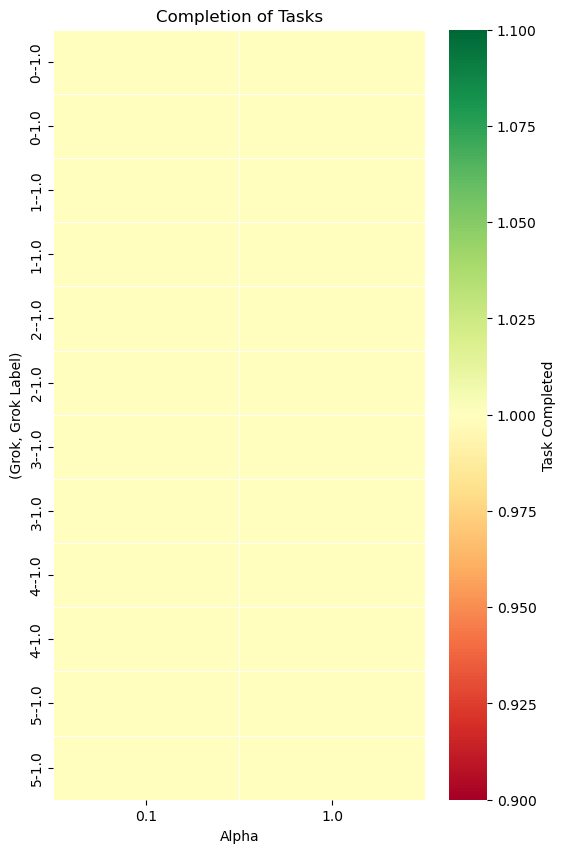

In [2]:
alpha_values = [0.1, 1.0]
grok_values = [0, 1, 2, 3, 4, 5]
grok_label_values = [None, -1, 1]

# Initialize a 2D list to store the status of each task.
completed_tasks = []

task_id = 0
for alpha in alpha_values:
    for grok in grok_values:
        for grok_label in grok_label_values:
            task_folder = os.path.join(job_folder, f"task_{task_id}")
            json_path = os.path.join(task_folder, "params.json")
            metrics_path = os.path.join(task_folder, "metrics_history.csv")
            bin_path = os.path.join(task_folder, "params.bin")
            plot_path = os.path.join(task_folder, "summary_plot.jpg")
            
            # Check if all files exist
            task_completed = os.path.exists(task_folder) and os.path.exists(json_path) and os.path.exists(metrics_path) and os.path.exists(bin_path) and os.path.exists(plot_path)
            
            completed_tasks.append((alpha, grok, grok_label, task_completed))
            task_id += 1

# Create a DataFrame from the 2D list
df = pd.DataFrame(completed_tasks, columns=['alpha', 'grok', 'grok_label', 'completed'])

# Pivot the DataFrame to create a 2D matrix for the heatmap.
df_pivot = df.pivot_table(index=['grok', 'grok_label'], columns='alpha', values='completed')

# Create the heatmap
plt.figure(figsize=(6, 10))
sns.heatmap(df_pivot, cmap="RdYlGn", cbar_kws={'label': 'Task Completed'}, linewidths=.5)
plt.title('Completion of Tasks')
plt.xlabel('Alpha')
plt.ylabel('(Grok, Grok Label)')
plt.show()